In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.1.0
sys.version_info(major=3, minor=6, micro=10, releaselevel='final', serial=0)
matplotlib 3.1.3
numpy 1.18.1
sklearn 0.22.1
tensorflow 2.1.0
keras 2.3.1


Using TensorFlow backend.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [4]:
print(np.max(x_train_scaled))

2.0231433


In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Sgd",
              metrics=["accuracy"])
model.layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [6]:
logdir = os.path.join("dnn-callbacks" )
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                   save_best_only = True),
    keras.callbacks.EarlyStopping(patience = 5,min_delta = 1e-3)
]
history = model.fit(x_train_scaled,y_train,epochs=10,
                    validation_data=(x_valid_scaled,y_valid),
                    callbacks = callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 116us/step - loss: 1.9694 - accuracy: 0.2434 - val_loss: 1.2442 - val_accuracy: 0.4204
Epoch 2/10
55000/55000 [==============================] - 6s 105us/step - loss: 0.8895 - accuracy: 0.6444 - val_loss: 0.7465 - val_accuracy: 0.7322
Epoch 3/10
55000/55000 [==============================] - 6s 105us/step - loss: 0.6208 - accuracy: 0.7825 - val_loss: 0.5317 - val_accuracy: 0.8286
Epoch 4/10
55000/55000 [==============================] - 6s 109us/step - loss: 0.5120 - accuracy: 0.8284 - val_loss: 0.4526 - val_accuracy: 0.8502
Epoch 5/10
55000/55000 [==============================] - 6s 105us/step - loss: 0.4521 - accuracy: 0.8498 - val_loss: 0.4122 - val_accuracy: 0.8656
Epoch 6/10
55000/55000 [==============================] - 6s 110us/step - loss: 0.4163 - accuracy: 0.8610 - val_loss: 0.3990 - val_accuracy: 0.8702
Epoch 7/10
55000/55000 [==============================] - 5s 95

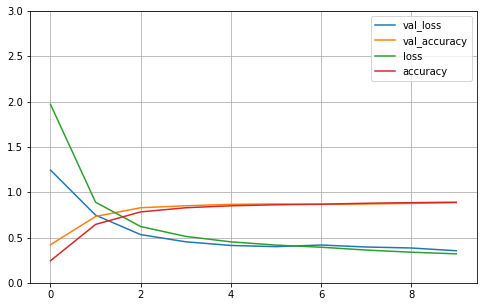

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,3)
    plt.show()
    
plot_learning_curves(history)
    

In [9]:
model.evaluate(x_test_scaled,y_test)

10000/10000 [==============================] - 0s 30us/step


[0.3911930453538895, 0.8702999949455261]